# K-MEANS CLUSTERING

Bu dersimizde Kaggle'dan edindiğimiz bir dataset kullanarak K-Means Clustering uygulaması yapacağız.

In [24]:

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

df = pd.read_csv("Kmeans.csv")
df.head()

,Ad,Yas,Gelir
0,Ismail,28,5900
1,Kaan,42,15100
2,Ozben,27,5750
3,Galip,39,15400
4,Batuhan,41,15900


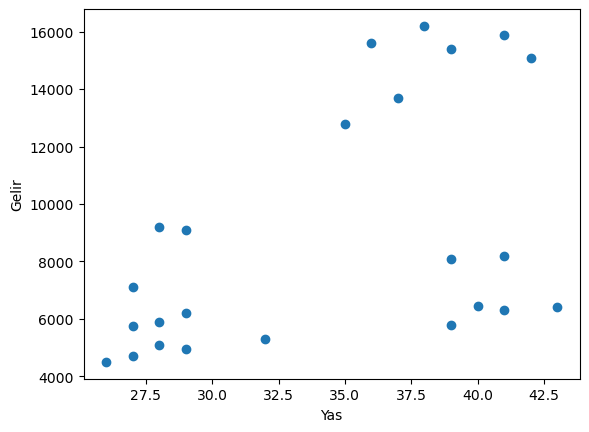

In [25]:
plt.scatter(df.Yas,df['Gelir'])
plt.xlabel('Yas')
plt.ylabel('Gelir')
plt.show()

# Veri setimize bir göz atalım:

### Unutmayın modelinize verileri basmadan önce mutlaka verilerinizi normalize etmeliyizz !

In [26]:
# Geçen dersimizde normalizasyonu biz kendimiz yapmıştık bu sefer sklearn kütüphaneis içinde bulunan 
# MinMaxScaler() fonksiyonunu kullanacağız:
scaler = MinMaxScaler()

scaler.fit(df[['Gelir']])
# normalizasyon
df['Gelir'] = scaler.transform(df[['Gelir']])

scaler.fit(df[['Yas']])
#normalizsayon
df['Yas'] = scaler.transform(df[['Yas']])


In [27]:
df.head()

,Ad,Yas,Gelir
0,Ismail,0.117647,0.119658
1,Kaan,0.941176,0.905983
2,Ozben,0.058824,0.106838
3,Galip,0.764706,0.931624
4,Batuhan,0.882353,0.974359


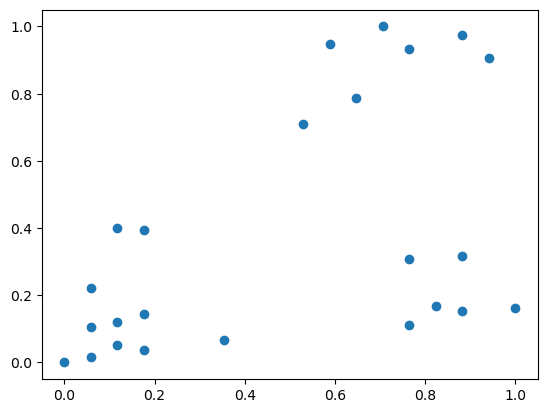

In [28]:
# Veri setimizi scatter çizimini yapalım: normalize edilmiş hali 
plt.scatter(df.Yas,df['Gelir'])
plt.show()


In [29]:
# K = 3 için bir K-Means modeli oluşturalım: gözle görülür biçimde 3 ana grup var gibi (noktalar) 
kmeans_modelim = KMeans(n_clusters=3)
#yaş ve gelire göre grupladı
y_predicted = kmeans_modelim.fit_predict(df[['Yas','Gelir']])
y_predicted

c:\Users\canoz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1])

In [30]:
df['cluster'] = y_predicted
df.head()

,Ad,Yas,Gelir,cluster
0,Ismail,0.117647,0.119658,1
1,Kaan,0.941176,0.905983,2
2,Ozben,0.058824,0.106838,1
3,Galip,0.764706,0.931624,2
4,Batuhan,0.882353,0.974359,2


In [31]:
# Centroidleri görelim:
kmeans_modelim.cluster_centers_   

array([[0.85294118, 0.20299145],
       [0.12834225, 0.14219114],
       [0.72268908, 0.89377289]])

In [32]:
type(kmeans_modelim.cluster_centers_) #2 boyutlu dizi tipinde 

numpy.ndarray

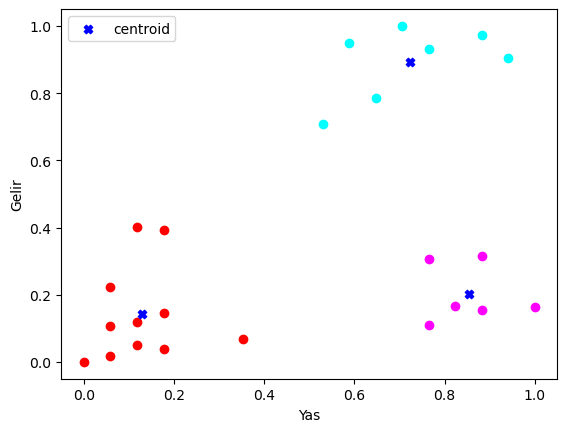

In [33]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.xlabel('Yas')
plt.ylabel('Gelir')
plt.scatter(df1.Yas,df1['Gelir'],color='magenta')
plt.scatter(df2.Yas,df2['Gelir'],color='red')
plt.scatter(df3.Yas,df3['Gelir'],color='cyan')

# kmeans_modelim.cluster_centers_ numpy 2 boyutlu array olduğu için x ve y sütunlarını kmeans_modelim.cluster_centers_[:,0] 
# ve kmeans_modelim.cluster_centers_[:,1] şeklinde scatter plot için alıyoruz:
plt.scatter(kmeans_modelim.cluster_centers_[:,0], kmeans_modelim.cluster_centers_[:,1], color='blue', marker='X', label='centroid')
plt.legend()
plt.show()

In [34]:
# Kimlerin hangi grupta olduğunu görüntüleyelim:

df.sort_values('cluster')[['Ad','cluster']]

,Ad,cluster
21,Seyma,0
19,Koray,0
18,Nihal,0
17,Gurkan,0
16,Veli,0
22,Tuncer,0
0,Ismail,1
20,Melih,1
15,Rauf,1
14,Seyma,1


## K Değerini Belirlemek - Elbow Yöntemi


In [37]:
# 1 den 19 a kadar 
k_range = range(1,20)

list_dist = []

for k in k_range:
    kmeans_modelim = KMeans(n_clusters=k)
    kmeans_modelim.fit(df[['Yas','Gelir']])
    list_dist.append(kmeans_modelim.inertia_)

c:\Users\canoz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\canoz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\canoz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\canoz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

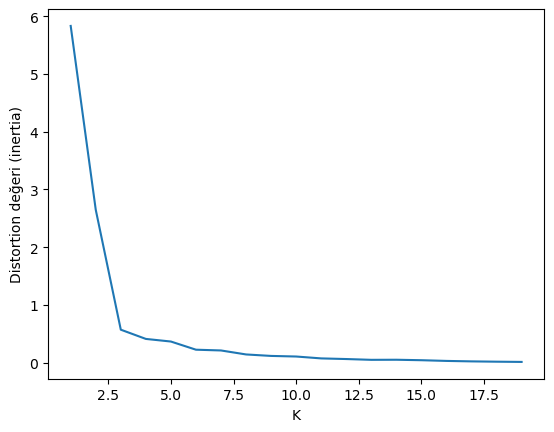

In [38]:

plt.xlabel('K')
plt.ylabel('Distortion değeri (inertia)')
plt.plot(k_range,list_dist)
plt.show()

### Sonuç:

 En iyi K değeri = 3